#             Seattle,WA vs Miami,FL | Rainfall Comparison

## Introduction

Everyone has a few places they dream of visiting, and one of mine is Florida, especially Miami. I often check the weather there and find it fascinating how different it can be from other parts of the United States. This made me curious about how Miami’s rainfall compares to Seattle, Washington, which is well known for its rainy weather. In this project, I will apply data science techniques to investigate whether it rains more in Seattle or in Miami. By analyzing weather data, I hope to satisfy my curiosity and uncover the real difference in rainfall between these two famous cities.

## Data Collection

We will use daily precipitation measured in Seattle and Miami from January 1, 2018 to December 31, 2022. The data sets were downloaded from the National Centers for Environmental Information NOAA Climate Data Online Search(https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) tool. The data sets seattle_rain.csv and florida_miami_rain.csv can be accessed from the Github repository(https://github.com/prithika029/weather/tree/main/data).

## Load and explore data

Importing libraries

In [486]:
# Importing pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing seaborn 
import seaborn as sns

#plotting style
sns.set_style("whitegrid")

Loading Seattle dataset

In [487]:
df_seattle = pd.read_csv("../data/seattle_rain .csv")

Loading Miami dataset

In [488]:
df_miami = pd.read_csv("../data/florida_miami_rain.csv")

In [489]:
df_seattle.head()                                   # Getting first 5 rows

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [490]:
df_miami.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,PSUN,SNOW,SNWD,WESD,WESF
0,US1FLBW0174,"HOLLYWOOD 2.0 SSE, FL US",02-11-2019,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN
1,US1FLMD0007,"SUNSET 2.4 SW, FL US",01-01-2018,NaN,NaN,0.00,NaN,0.0,NaN,NaN,NaN
2,US1FLMD0007,"SUNSET 2.4 SW, FL US",02-01-2018,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,US1FLMD0007,"SUNSET 2.4 SW, FL US",03-01-2018,NaN,NaN,0.48,NaN,NaN,NaN,NaN,NaN
4,US1FLMD0007,"SUNSET 2.4 SW, FL US",04-01-2018,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN


In [491]:
df_seattle.columns #listing the column names

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [492]:
df_miami.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'PSUN', 'SNOW',
       'SNWD', 'WESD', 'WESF'],
      dtype='object')

In [493]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [494]:
df_miami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  45210 non-null  object 
 1   NAME     45210 non-null  object 
 2   DATE     45210 non-null  object 
 3   DAPR     751 non-null    float64
 4   MDPR     748 non-null    float64
 5   PRCP     44424 non-null  float64
 6   PSUN     1 non-null      float64
 7   SNOW     17770 non-null  float64
 8   SNWD     2757 non-null   float64
 9   WESD     11 non-null     float64
 10  WESF     13 non-null     float64
dtypes: float64(8), object(3)
memory usage: 3.8+ MB


In [495]:
df_seattle.shape                  # Getting number of rows and columns

(1658, 10)

In [496]:
df_miami.shape

(45210, 11)

In [497]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [498]:
df_miami['STATION'].unique()

array(['US1FLBW0174', 'US1FLMD0007', 'US1FLBW0131', 'US1FLBW0153',
       'US1FLMD0026', 'US1FLBW0110', 'US1FLBW0155', 'US1FLBW0170',
       'US1FLMD0003', 'US1FLMD0023', 'US1FLMD0067', 'US1FLMD0100',
       'US1FLMD0042', 'US1FLMD0040', 'US1FLMD0084', 'US1FLMD0041',
       'US1FLMD0082', 'US1FLBW0013', 'US1FLMD0061', 'US1FLMD0083',
       'US1FLMD0080', 'USW00092809', 'US1FLMD0081', 'US1FLBW0045',
       'USC00086315', 'US1FLMD0079', 'USW00012882', 'USC00085667',
       'US1FLMD0036', 'US1FLBW0161', 'US1FLMD0033', 'US1FLMD0099',
       'USW00092811', 'US1FLMD0111', 'US1FLMD0075', 'USW00012839',
       'US1FLMD0095', 'US1FLMD0030', 'USC00081306', 'US1FLBW0168',
       'US1FLMD0094', 'US1FLBW0004', 'US1FLBW0048', 'US1FLBW0103',
       'US1FLMD0092', 'USC00083909'], dtype=object)

In [499]:
df_seattle['STATION'].nunique()

1

In [500]:
df_miami['STATION'].nunique()

46

In [501]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

In [502]:
df_miami['DATE']

0        02-11-2019
1        01-01-2018
2        02-01-2018
3        03-01-2018
4        04-01-2018
            ...    
45205    27-12-2022
45206    28-12-2022
45207    29-12-2022
45208    30-12-2022
45209    31-12-2022
Name: DATE, Length: 45210, dtype: object

In [503]:
df_seattle['DATE'].max()

'9/9/22'

In [504]:
df_seattle['DATE'].tail()              # Getting last 5 rows to know the maximum date

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

Converting the string 'DATE' to datetime object because date column is in string

In [505]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE']).dt.strftime('%Y-%m-%d')  #converted and format changed        

In [506]:
df_seattle['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1653    2022-12-27
1654    2022-12-28
1655    2022-12-29
1656    2022-12-30
1657    2022-12-31
Name: DATE, Length: 1658, dtype: object

In [507]:
df_miami['DATE'] = pd.to_datetime(df_miami['DATE'], dayfirst=True).dt.strftime('%Y-%m-%d') 

In [508]:
df_miami['DATE']

0        2019-11-02
1        2018-01-01
2        2018-01-02
3        2018-01-03
4        2018-01-04
            ...    
45205    2022-12-27
45206    2022-12-28
45207    2022-12-29
45208    2022-12-30
45209    2022-12-31
Name: DATE, Length: 45210, dtype: object

In [509]:
df_seattle['DATE'].agg(['min','max'])

min    2018-01-01
max    2022-12-31
Name: DATE, dtype: object

In [510]:
df_miami['DATE'].agg(['min','max'])

min    2018-01-01
max    2022-12-31
Name: DATE, dtype: object

Plotting line plot using seaborn library

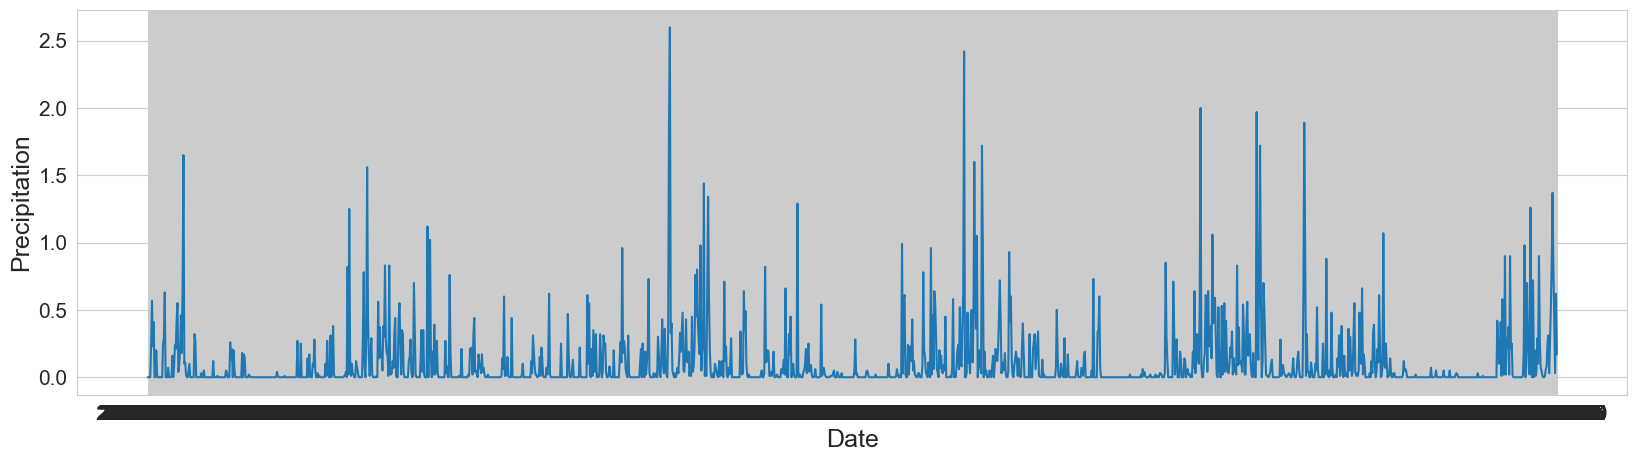

In [414]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_seattle, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation', fontsize = 18)

plt.tick_params(labelsize = 15)

plt.show()

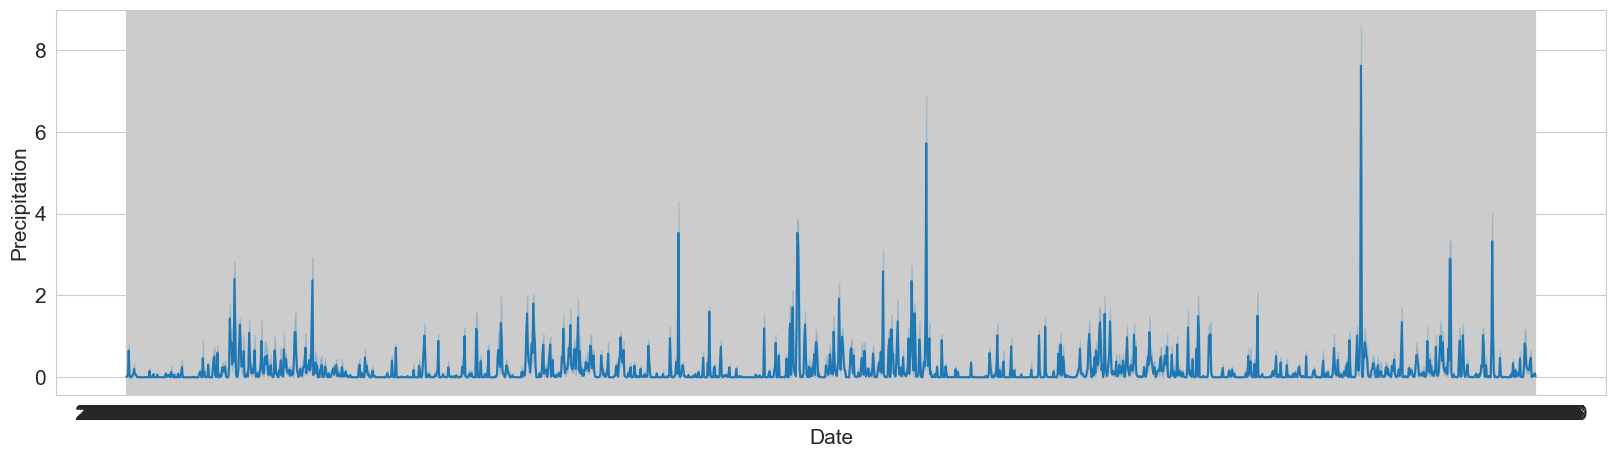

In [415]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_miami, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)
plt.show()

In [511]:
df_miami['NAME'].unique()

array(['HOLLYWOOD 2.0 SSE, FL US', 'SUNSET 2.4 SW, FL US',
       'MIRAMAR 2.3 W, FL US', 'PEMBROKE PINES 4.1 E, FL US',
       'MIAMI LAKES 0.3 NNW, FL US', 'HOLLYWOOD 1.1 WNW, FL US',
       'COOPER CITY 1.3 NE, FL US', 'HOLLYWOOD 2.2 SE, FL US',
       'LINDGREN ACRES 0.5 WSW, FL US', 'MIAMI 4.1 SE, FL US',
       'PALMETTO BAY 0.6 WNW, FL US', 'CORAL TERRACE 1.3 SSE, FL US',
       'SOUTH MIAMI 0.9 SSE, FL US', 'MIAMI 6.7 WSW, FL US',
       'KENDALE LAKES 1.5 WNW, FL US', 'LINDGREN ACRES 0.7 SW, FL US',
       'CUTLER 0.7 NNW, FL US', 'MIRAMAR 3.0 WNW, FL US',
       'MIAMI 15.1 WSW, FL US', 'MIAMI LAKES 2.1 WNW, FL US',
       'KENDALL 1.6 N, FL US', 'HOLLYWOOD NORTH PERRY AIRPORT, FL US',
       'PALMETTO BAY 0.5 NW, FL US', 'MIRAMAR 3.7 E, FL US',
       'NORTH MIAMI BEACH NUMBER 2, FL US', 'MIAMI 5.7 N, FL US',
       'MIAMI OPA LOCKA AIRPORT, FL US', 'MIAMI NWSFO, FL US',
       'SUNSET 1.1 NE, FL US', 'PEMBROKE PINES 0.7 N, FL US',
       'BISCAYNE PARK 0.3 E, FL US', 'SUNSE

Selecting only one station from Miami dataset

In [527]:
df_miami = df_miami.loc[df_miami['NAME'] == 'MIAMI BEACH, FL US']

In [528]:
df_miami['STATION'].unique()

array(['USW00092811'], dtype=object)

In [529]:
df_miami.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 31072 to 32669
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1598 non-null   object 
 1   NAME     1598 non-null   object 
 2   DATE     1598 non-null   object 
 3   DAPR     0 non-null      float64
 4   MDPR     0 non-null      float64
 5   PRCP     1596 non-null   float64
 6   PSUN     0 non-null      float64
 7   SNOW     0 non-null      float64
 8   SNWD     0 non-null      float64
 9   WESD     0 non-null      float64
 10  WESF     0 non-null      float64
dtypes: float64(8), object(3)
memory usage: 149.8+ KB


In [530]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


Joining Seattle and Stlouis dataframes and keeping only DATE and PRCP columns

There are some of the missing dates from both the dataset. So, we are choosing 'outer' join to merge two datasets together.

Selecting only 'DATE' and 'PRCP' columns from both the dataset.

In [531]:
df = df_miami[['DATE','PRCP']].merge(df_seattle[['DATE','PRCP']], on = 'DATE', how = 'outer')

In [532]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,1.5,0.00
3,2018-01-04,0.1,0.00
4,2018-01-05,0.0,0.25


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 0 to 1810
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1811 non-null   object 
 1   PRCP_x  1596 non-null   float64
 2   PRCP_y  1636 non-null   float64
dtypes: float64(2), object(1)
memory usage: 56.6+ KB


For 5 year we should have 1826 days but we have only 1811 days

Creating a dataframe which includes all the dates from 2018-01-01 to 2022-12-31

In [534]:
full_range = pd.date_range(start=df_seattle['DATE'].min(),
                           end=df_seattle['DATE'].max(),
                           freq='D')

In [535]:
df_date = pd.DataFrame(full_range, columns = ['DATE'])

In [536]:
df_date['DATE'] = pd.to_datetime(df_date['DATE']).dt.strftime('%Y-%m-%d')

In [537]:
df_date

,DATE
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1821,2022-12-27
1822,2022-12-28
1823,2022-12-29
1824,2022-12-30


Merging date dataframe with the Seattle and Miami dataframe

In [538]:
df = df_date.merge(df, on = 'DATE', how = 'outer')

In [539]:
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,1.50,0.00
3,2018-01-04,0.10,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.15,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.00,0.62


Turning the dataset from wide format to tidy data using 'melt'

In [540]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')

In [541]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,1.5
3,2018-01-04,PRCP_x,0.1
4,2018-01-05,PRCP_x,0.0


Renaming city values to 'SEA and 'MIA'

In [542]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'MIA'

In [543]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [544]:
df.head()

,DATE,city,precipitation
0,2018-01-01,MIA,0.0
1,2018-01-02,MIA,0.0
2,2018-01-03,MIA,1.5
3,2018-01-04,MIA,0.1
4,2018-01-05,MIA,0.0


In [545]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


In [546]:
df = df.rename(columns = {'DATE' : 'date'})

In [547]:
df.head()

,date,city,precipitation
0,2018-01-01,MIA,0.0
1,2018-01-02,MIA,0.0
2,2018-01-03,MIA,1.5
3,2018-01-04,MIA,0.1
4,2018-01-05,MIA,0.0


Identifying and filling  missing values

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3652 non-null   object 
 1   city           3652 non-null   object 
 2   precipitation  3232 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.7+ KB


In [549]:
df.isna().sum()

date               0
city               0
precipitation    420
dtype: int64

Finding number of missing values in each city

In [550]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

190

In [551]:
df.loc[df['city'] == 'MIA', 'precipitation'].isna().sum()

230

### Replacing missing values with the mean across years of values on that day.

Defining a column that labels each day by the day of the year: 1, 2,...,365.

In [552]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [553]:
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,MIA,0.0,1
1,2018-01-02,MIA,0.0,2
2,2018-01-03,MIA,1.5,3
3,2018-01-04,MIA,0.1,4
4,2018-01-05,MIA,0.0,5


In [554]:
mean_day_precipitation = df.loc[df['city'] == 'SEA', ['precipitation','day_of_year']].groupby('day_of_year').mean()

In [555]:
mean_day_precipitation = df.loc[df['city'] == 'MIA', ['precipitation','day_of_year']].groupby('day_of_year').mean()

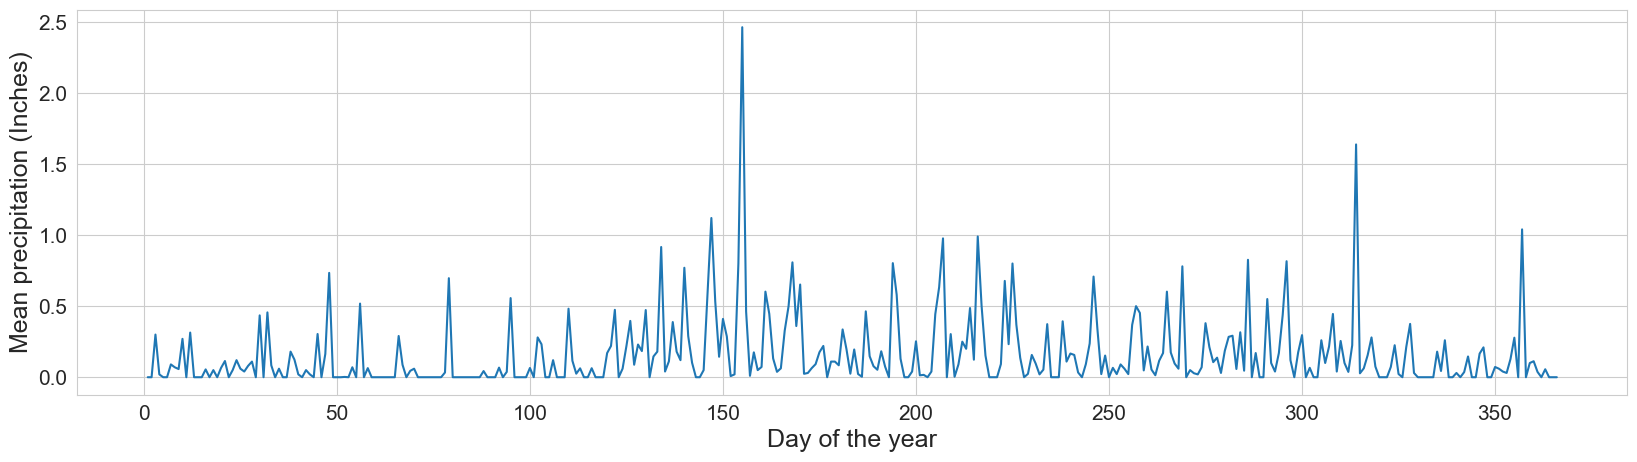

In [556]:
plt.figure(figsize = (20,5))

sns.lineplot(data = mean_day_precipitation, x = 'day_of_year', y = 'precipitation')

plt.xlabel('Day of the year', fontsize = 18)
plt.ylabel('Mean precipitation (Inches)', fontsize = 18)

plt.tick_params(labelsize = 15)

plt.show()

In [557]:
df['precipitation'].isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [558]:
# Getting the index of the missing precipitation value

indices = np.where(df['precipitation'].isna()  == True)[0]

In [559]:
# Replacing the missing precipitation values with the corresponding mean on that day

for index in indices:
    df.loc[index,'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

In [560]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

### Export the clean .csv file

In [561]:
df.to_csv('clean_seattle_miami_weather.csv', encoding = 'utf-8-sig', index = False)

## Exploratory data analysis

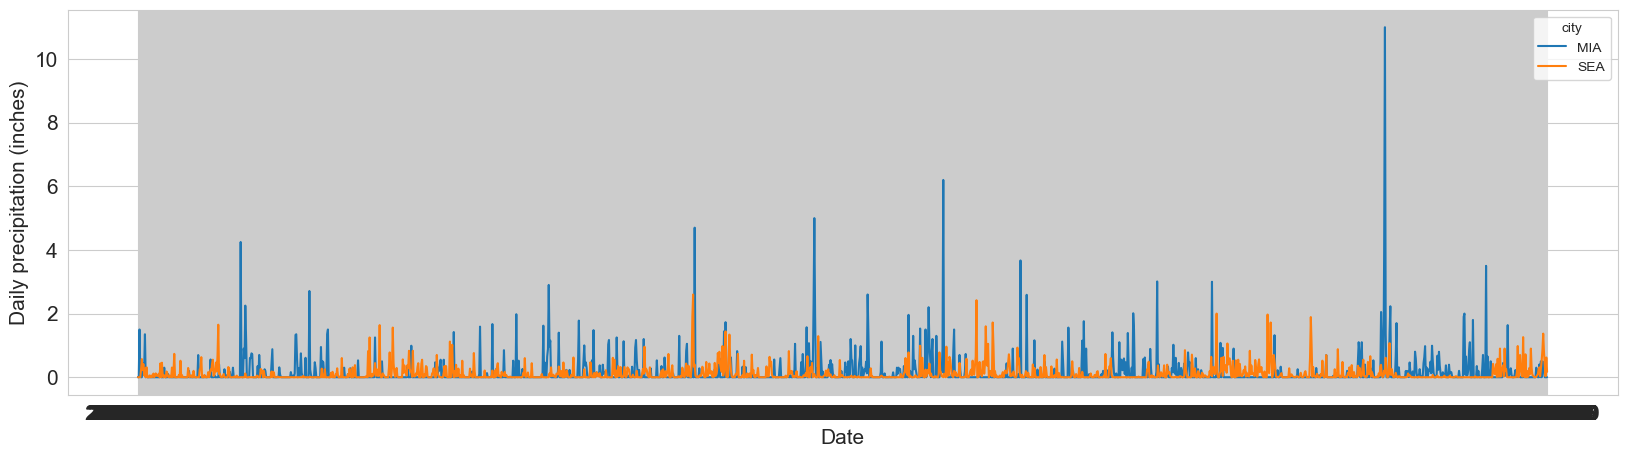

In [570]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df, x = 'date', y = 'precipitation', hue = 'city')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15)
        
plt.tick_params(labelsize = 15)

plt.show()

Computing basic numerical summaries for precipitation in each city

Precipitation has values for both cities, so we have to compute summaries including cities.

In [571]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                               
             count      mean      std  min  25%   50%   75%   max
city                                                             
MIA         1826.0  0.159687  0.51836  0.0  0.0  0.00  0.05  11.0
SEA         1826.0  0.112072  0.24431  0.0  0.0  0.01  0.11   2.6

Compare mean precipitation values averaged over all days

In [572]:
df[['city','precipitation']].groupby('city').mean()

,precipitation
city,
MIA,0.159687
SEA,0.112072


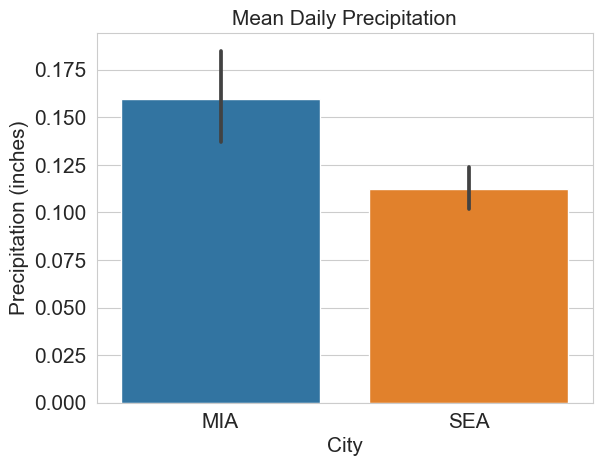

In [573]:
sns.barplot(data = df, x = 'city', y = 'precipitation')

plt.xlabel('City', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.title('Mean Daily Precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

Precipitation by month

Add the column to the dataframe with the number of the month

In [574]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [575]:
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,MIA,0.0,1,1
1,2018-01-02,MIA,0.0,2,1
2,2018-01-03,MIA,1.5,3,1
3,2018-01-04,MIA,0.1,4,1
4,2018-01-05,MIA,0.0,5,1


In [576]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Plot the distribution of precipitation amounts each month using boxplots

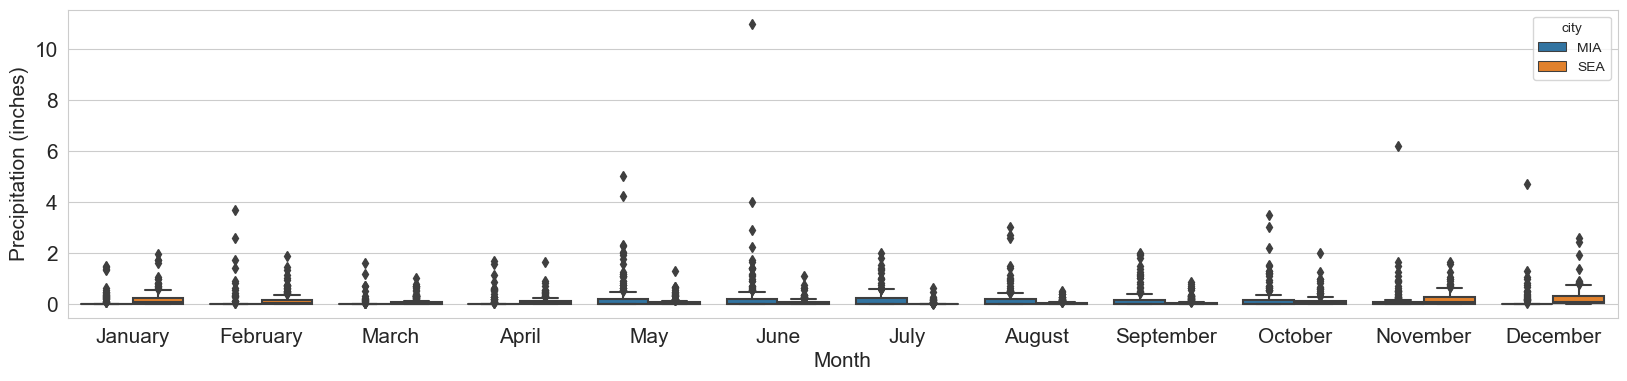

In [577]:
plt.figure(figsize = (20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

#Get month names and set as x-axis tick labels
import calendar
#Get month names
month_names = list(calendar.month_name[1:])  
#Set x axis ticks to month names
plt.xticks(ticks = range(12), labels = month_names)

plt.show()

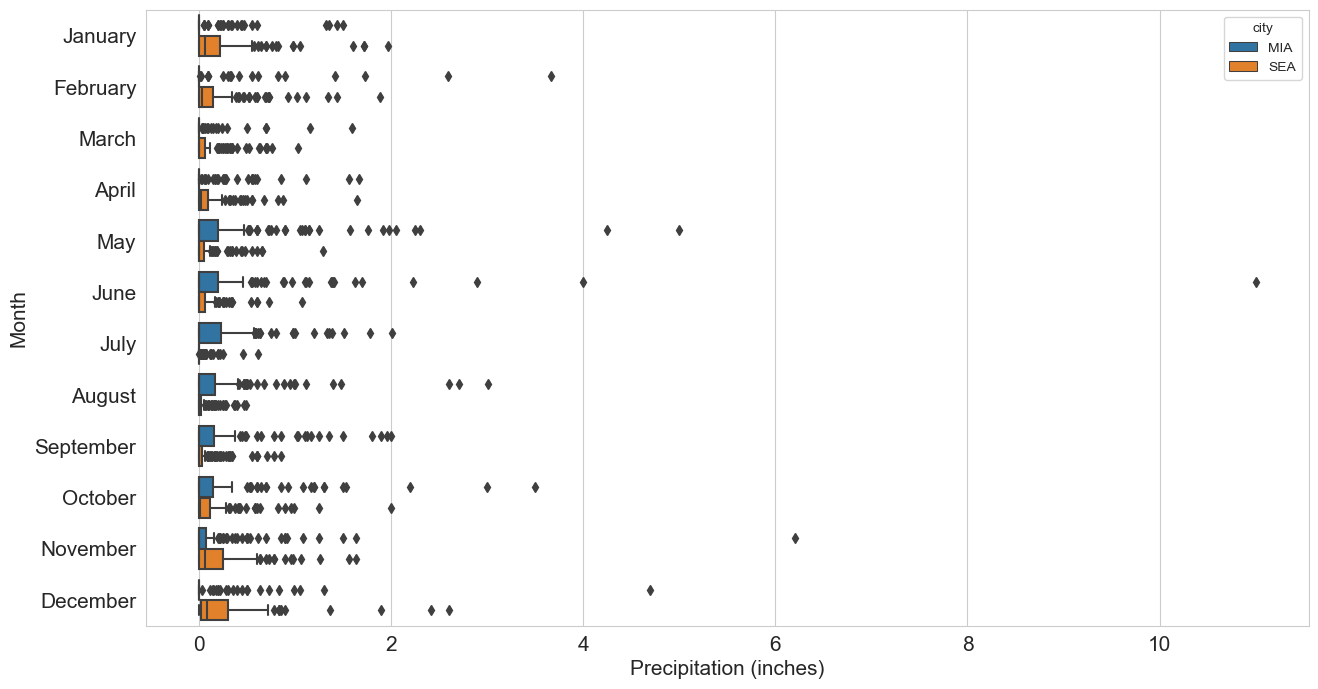

In [578]:
plt.figure(figsize = (15,8))

sns.boxplot(data = df, x = 'precipitation', y = 'month', hue = 'city', orient = 'h')

plt.ylabel('Month', fontsize = 15)
plt.xlabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

#Get month names
month_names = list(calendar.month_name[1:])  
#Set y axis ticks to month names
plt.yticks(ticks = range(12), labels = month_names)

plt.show()

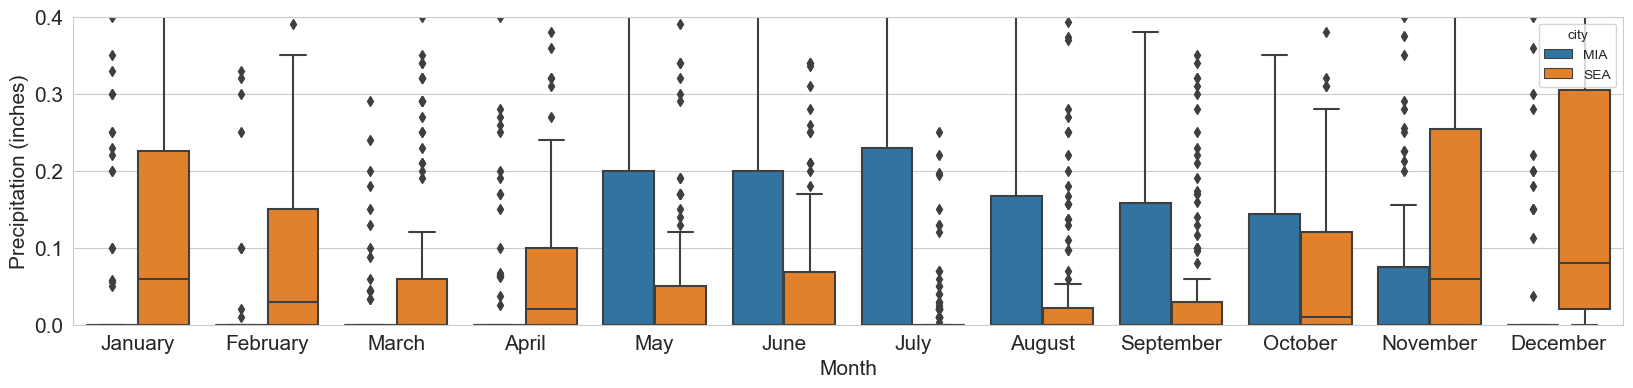

In [579]:
plt.figure(figsize = (20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

month_names = list(calendar.month_name[1:])  

plt.xticks(ticks = range(12), labels = month_names)

plt.ylim(0, 0.4)

plt.show()

Plot the mean precipitation each month

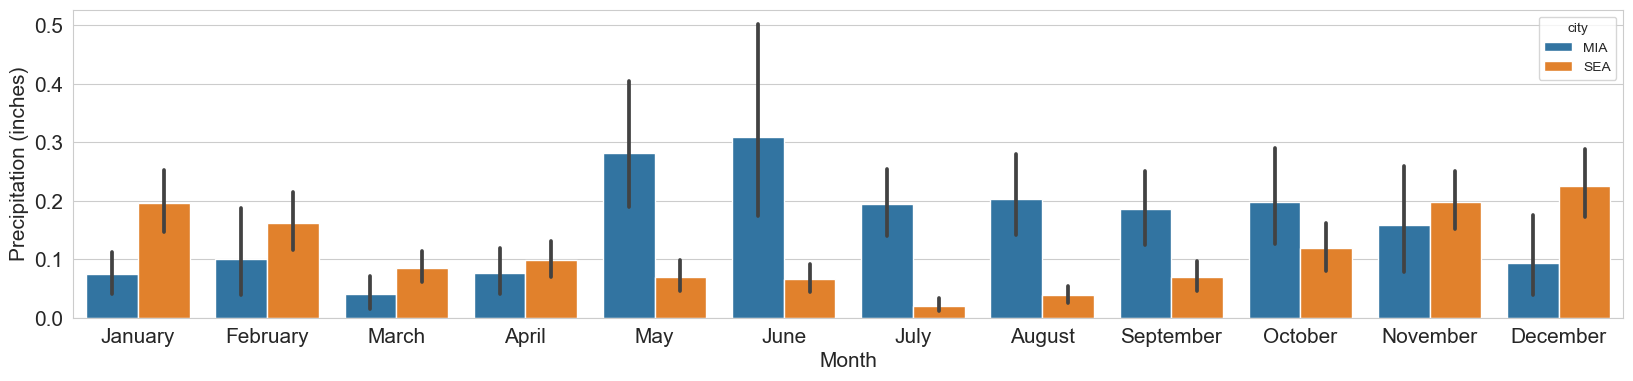

In [580]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)  

plt.xticks(ticks = range(12), labels = month_names)

plt.show()

Computing the mean precipitation each month

In [581]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
MIA  1           0.074242
     2           0.101064
     3           0.040511
     4           0.075917
     5           0.281097
     6           0.309094
     7           0.194081
     8           0.203387
     9           0.185283
     10          0.198274
     11          0.157783
     12          0.093097
SEA  1           0.196526
     2           0.161787
     3           0.084946
     4           0.098544
     5           0.069161
     6           0.066960
     7           0.020747
     8           0.038989
     9           0.069053
     10          0.118452
     11          0.198807
     12          0.224903

Plot the proportion of days with any precipitation

Add a variable to the dataframe that indicates whether there was any precipitation


In [582]:
df['any_precipitation'] = df['precipitation'] > 0

In [583]:
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,MIA,0.0,1,1,False
1,2018-01-02,MIA,0.0,2,1,False
2,2018-01-03,MIA,1.5,3,1,True
3,2018-01-04,MIA,0.1,4,1,True
4,2018-01-05,MIA,0.0,5,1,False


Plot the proportion of days with any precipitation over the 5 years

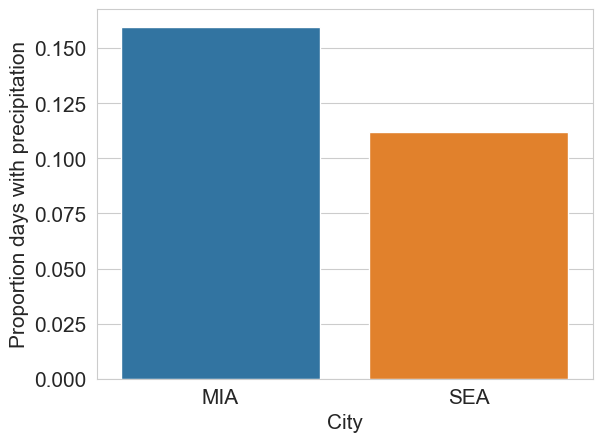

In [584]:
sns.barplot(data = df, x = 'city', y = 'precipitation', errorbar = None)

plt.xlabel('City', fontsize = 15)
plt.ylabel('Proportion days with precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

Plot the proportion of days with precipitation each month

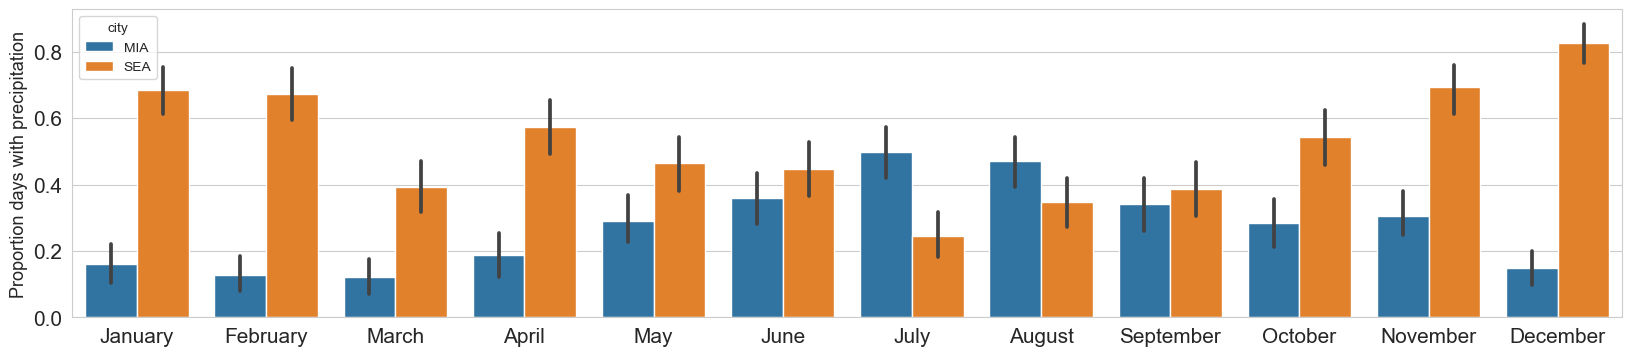

In [585]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city')

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize = 13)
plt.xticks(ticks = range(12), labels = month_names)
plt.tick_params(labelsize = 15)

plt.show()

### Analyses

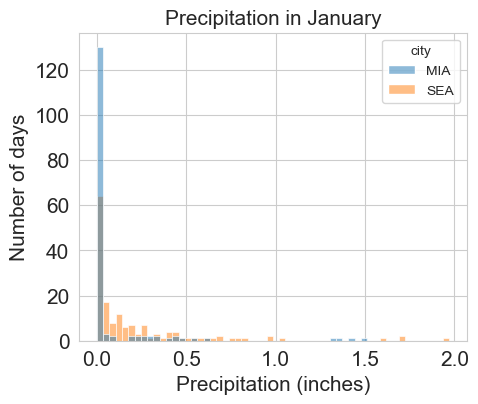

In [586]:
plt.figure(figsize = (5,4))

sns.histplot(data = df.loc[df['month'] == 1], x = 'precipitation', hue = 'city')

plt.xlabel('Precipitation (inches)', fontsize = 15)
plt.ylabel('Number of days', fontsize = 15)
plt.title('Precipitation in January', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

In [587]:
from scipy import stats

significance_level = 0.05
significantly_different = np.zeros(12)

#perform t-test for each month
for month in range(1,13):
    #Get precipitation data for Seattle and Miami for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == 'month'), 'precipitation']
    stl_data = df.loc[(df['city'] == 'MIA') & (df['month'] == 'month'), 'precipitation']
    
    t_statistic, p_value = stats.ttest_ind(sea_data, stl_data, equal_var = False)
    
    if p_value < significance_level:
        significantly_different[month - 1] = 1
        
    print(f"Month {month}:")
    print(f" t-statistic = {t_statistic:.2f}")
    print(f" p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 2:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 3:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 4:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 5:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 6:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 7:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 8:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 9:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 10:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 11:
 t-statistic = nan
 p-value t test = nan
--------------------
Month 12:
 t-statistic = nan
 p-value t test = nan
--------------------


Plot the mean precipitation each month with a star for significant differences

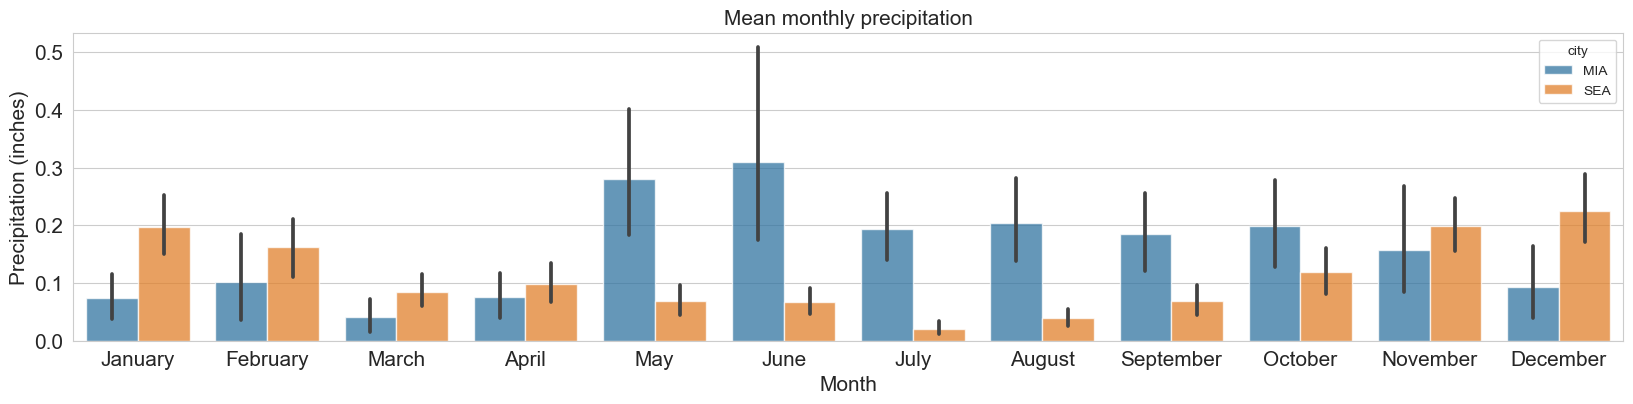

In [588]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city', alpha = 0.75)

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.title('Mean monthly precipitation', fontsize = 15)

plt.tick_params(labelsize =15)

plt.xticks(ticks = range(12), labels = month_names)

#Add stars for significantly different months
for month in range(12):
    if significantly_different[month] == 1:
        #Add a star
        plt.text(month, 0.3, '*', ha = 'center', fontsize = 25)
        
plt.show()

Performing a statistical test for differences in the proportion of days with any precipitation each month between the cities

In [589]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

#Perform t-test for each month
for month in range(1,13):
    
    #Create a contingency table for Seattle and Miami for the current month
    contingency_table = pd.crosstab(df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation'])
    
    #Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]
    
    #Calculate the total number of days for each city
    total_counts = contingency_table.sum(axis = 1)
    
    #Hypothesis test
    zstat, p_value = proportions_ztest(count = days_with_precipitation, nobs = total_counts, alternative = 'two-sided')
    
    if p_value < significance_level:
        significantly_different_proportion[month - 1] = 1
        
print(f"Month {month}:")
print(f" z-statistic = {zstat:.2f}")
print(f" p-value = {p_value:.3f}")
print("-" * 20)
        

Month 12:
 z-statistic = -11.93
 p-value = 0.000
--------------------


In [590]:
contingency_table = pd.crosstab(df.loc[df['month'] == 1, 'city'], df.loc[df['month'] == 1, 'any_precipitation'])

contingency_table

any_precipitation,False,True
city,,
MIA,130,25
SEA,49,106


Plot the proportion of days with any precipitation each month with a star for significant differences

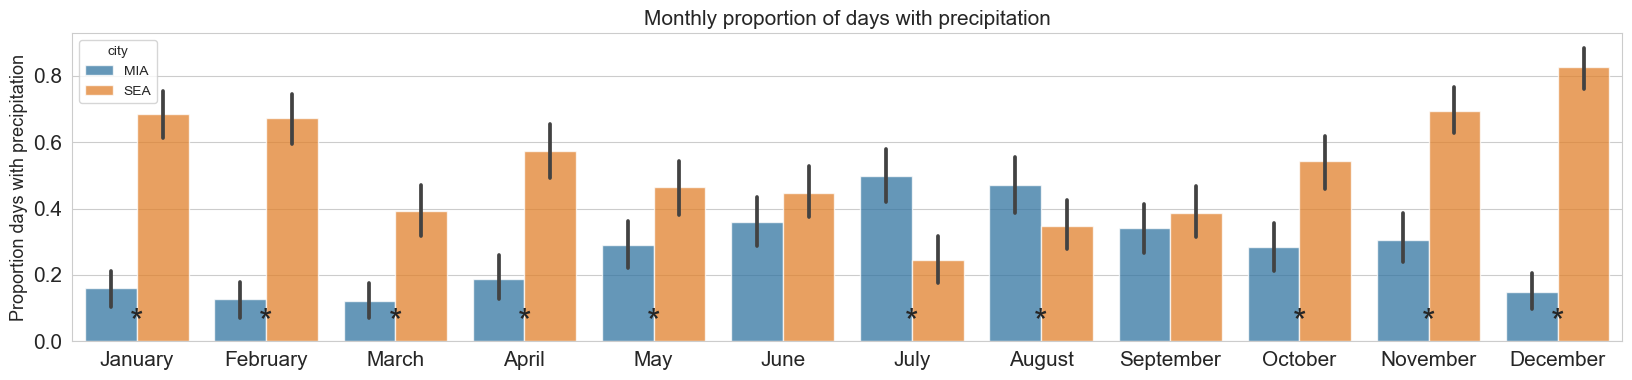

In [591]:
plt.figure(figsize = (20,4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city', alpha = 0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize = 13)
plt.title("Monthly proportion of days with precipitation", fontsize = 15)

plt.xticks(ticks = range(12), labels = month_names)
plt.tick_params(labelsize = 15)

#Add star for significantly different months
for month in range(12):
    if significantly_different_proportion[month] == 1:
        
        #Add a star
        plt.text(month, 0.025,'*', ha = 'center', fontsize = 25)
        
plt.show()

end